<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.contingency_tables import cochrans_q

from scipy.stats import ttest_ind , chi2_contingency

#### ‚úÖ 1.1 EDA & Í≤∞Ï∏°Ïπò Î∞è Ïù¥ÏÉÅÏπòÎ•º ÌåêÎã®ÌïòÍ≥† ÏÑ§Î™Ö

In [64]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv",index_col=0)
df = df.drop(columns = 'id', axis = 1)
df.head(3)

Gender  Age  Height  Weight family_history_with_overweight FAVC       FCVC  \
0   male   27    1.80      87                             no   no     always   
1   male   26    1.85     105                            yes  yes     always   
2   male   41    1.80      99                             no  yes  sometimes   

   NCP        CAEC SMOKE               CH2O SCC     FAF     TUE        CALC  \
0    3   sometimes    no  between 1 and 2 l  no  2 to 4  0 to 2  frequently   
1    3  frequently    no      more than 2 l  no  2 to 4      >5   sometimes   
2    3   sometimes    no  between 1 and 2 l  no  2 to 4  3 to 5  frequently   

                  MTRANS          NObeyesdad        BMI  
0                walking  overweight_level_i  26.851852  
1  public_transportation      obesity_type_i  30.679328  
2             automobile      obesity_type_i  30.555556

Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0    0       0       0                               0     0     0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  BMI  
0    0     0      0     0    3    0    0     0       0           0    0

ÌÜµÍ≥ÑÌëú


Age       Height       Weight          NCP          BMI
count  1262.000000  1262.000000  1262.000000  1262.000000  1262.000000
mean     25.749604     1.709184   101.083201     2.665610    34.439463
std       9.898088     0.091361    21.520848     0.757143     6.106623
min      15.000000     1.450000    53.000000     1.000000    22.826739
25%      21.000000     1.631576    82.000000     3.000000    30.725995
50%      24.000000     1.711095   105.000000     3.000000    34.332001
75%      27.000000     1.775768   116.000000     3.000000    38.920119
max     150.000000     1.980000   173.000000     4.000000    50.811753

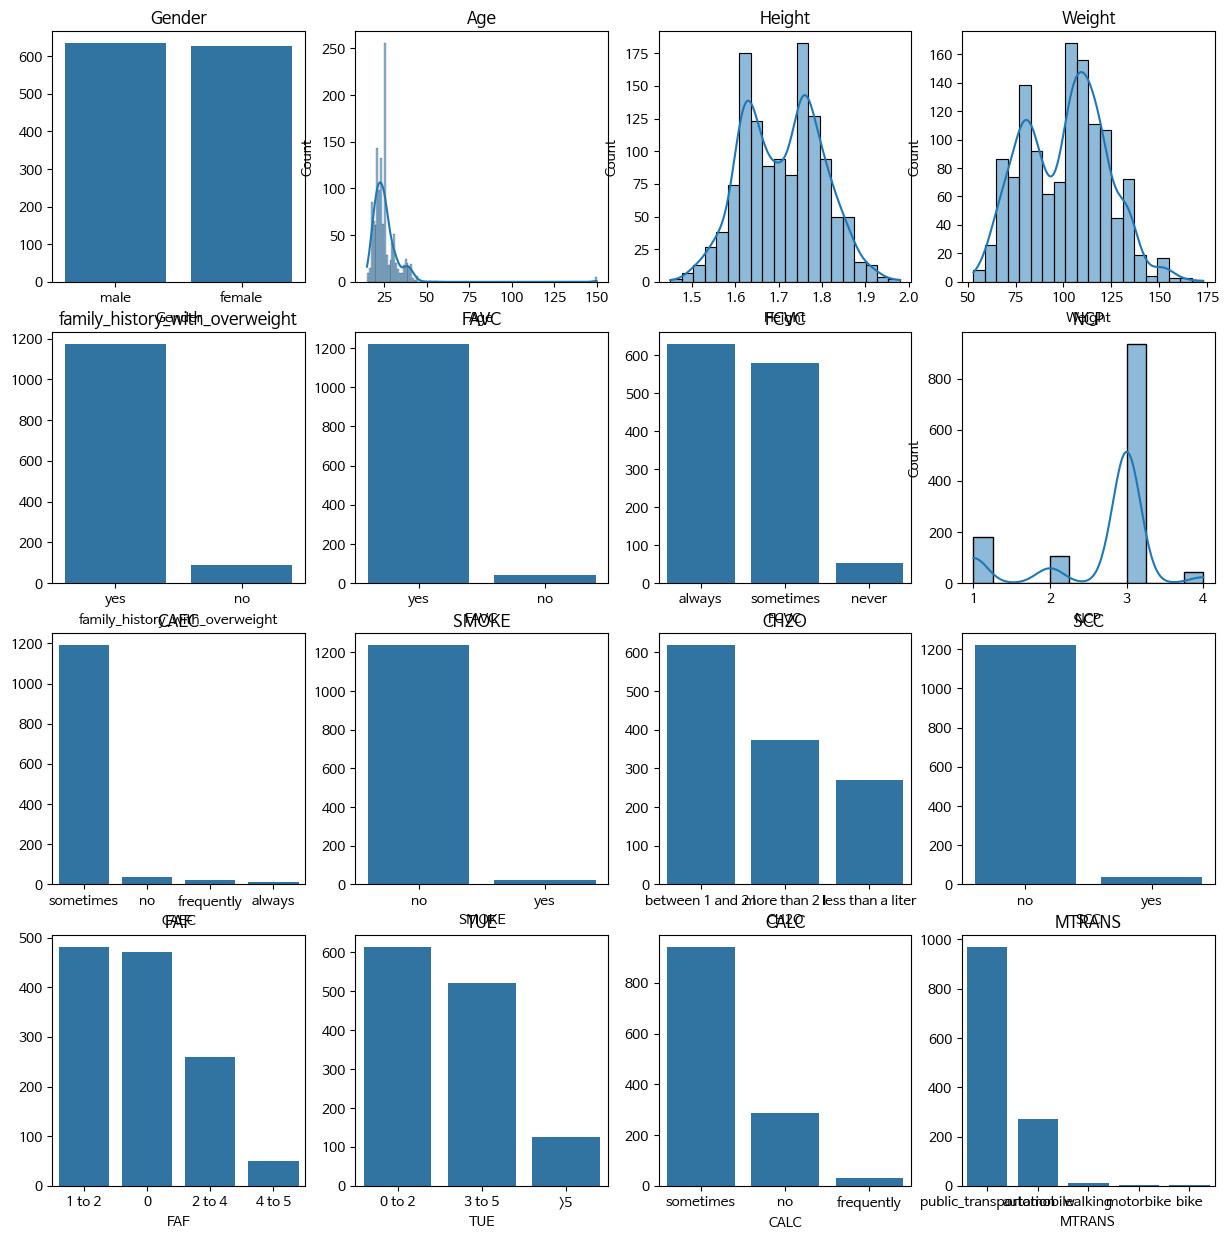

<Figure size 640x480 with 0 Axes>

In [65]:
# Í≤∞Ï∏°Ïπò
display(df.isna().sum().to_frame().T)
# SCC 3

# ÌÜµÍ≥ÑÌëú
print("ÌÜµÍ≥ÑÌëú")
display(df.describe())


# Î∂ÑÌè¨ÎèÑ Í∑∏Î¶º
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, axes in enumerate(axes.flat[:len(df.columns)]) :
  col_i = df.columns[i]

  if df[col_i].dtype == 'object' :
    target =  df[col_i].value_counts()
    sns.barplot(x= target.index, y = target.values, ax = axes)
    axes.set_title(col_i)

  else :
    sns.histplot(df[col_i], kde = True, ax = axes)
    axes.set_title(col_i)


plt.show()
plt.tight_layout()


ÏàòÏπòÌòï Î≥ÄÏàòÎì§Î°úÎßå ÏÉÅÍ¥Ä Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌïú Í≤∞Í≥º, BMIÏôÄ WeightÎäî Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïó¨ Ï§ëÎ≥µÎêú Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.
Ïù¥Îäî Ìñ•ÌõÑ Î™®Îç∏ÎßÅ Ïãú Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÎ•º ÏùºÏúºÌÇ¨ Ïàò ÏûàÏúºÎØÄÎ°ú, ÌïòÎÇòÏùò Î≥ÄÏàòÎßå ÏÑ†ÌÉùÌïòÎäî Í≤ÉÎèÑ Í≥†Î†§Ìï† Ïàò ÏûàÎã§.
Í∑∏ Ïô∏ Î≥ÄÏàòÎì§ Í∞ÑÏóêÎäî Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïó¨ Î≥ÄÏàò Í∞Ñ Ï§ëÎ≥µÏùÄ ÌÅ¨ÏßÄ ÏïäÏïÑÎ≥¥Ïù∏Îã§.



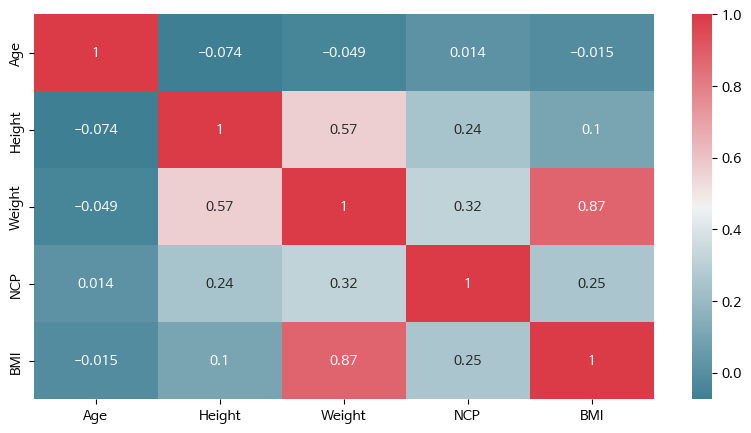

In [66]:
# ÏÉÅÍ¥ÄÎ∂ÑÏÑù
num_col = df.select_dtypes(exclude = 'object').columns
cor_mat = df[num_col].corr()

plt.figure(figsize = (10,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor_mat, cmap = cmap, annot= True)

print('''
ÏàòÏπòÌòï Î≥ÄÏàòÎì§Î°úÎßå ÏÉÅÍ¥Ä Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌïú Í≤∞Í≥º, BMIÏôÄ WeightÎäî Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïó¨ Ï§ëÎ≥µÎêú Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.
Ïù¥Îäî Ìñ•ÌõÑ Î™®Îç∏ÎßÅ Ïãú Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÎ•º ÏùºÏúºÌÇ¨ Ïàò ÏûàÏúºÎØÄÎ°ú, ÌïòÎÇòÏùò Î≥ÄÏàòÎßå ÏÑ†ÌÉùÌïòÎäî Í≤ÉÎèÑ Í≥†Î†§Ìï† Ïàò ÏûàÎã§.
Í∑∏ Ïô∏ Î≥ÄÏàòÎì§ Í∞ÑÏóêÎäî Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïó¨ Î≥ÄÏàò Í∞Ñ Ï§ëÎ≥µÏùÄ ÌÅ¨ÏßÄ ÏïäÏïÑÎ≥¥Ïù∏Îã§.
''')


AgeÏóêÏÑú 150ÏÇ¥Ïù¥ÎùºÎäî Ïù¥ÏÉÅÏπòÍ∞Ä ÎÇòÌÉÄÎÇòÍ≥† ÏûàÏúºÎ©∞, Weight 175ÎùºÎäî ÏàòÏπòÍ∞Ä ÏûàÏßÄÎßå Ïù¥Îäî Í≥†ÎèÑ ÎπÑÎßå Ïùº Ïàò ÏûàÎã§Îäî Ï†êÏùÑ Í∞ÄÎßåÌï¥
Ïù¥ÏÉÅÏπòÎ°ú Î≥¥ÏßÄ ÏïäÎäîÎã§. Age Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïúÎã§.



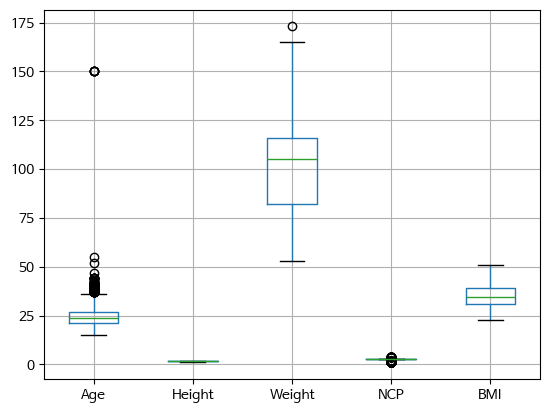

In [67]:
## Ïù¥ÏÉÅÏπò

num_col = df.select_dtypes(exclude = 'object').columns
df[num_col].boxplot()
print('''
AgeÏóêÏÑú 150ÏÇ¥Ïù¥ÎùºÎäî Ïù¥ÏÉÅÏπòÍ∞Ä ÎÇòÌÉÄÎÇòÍ≥† ÏûàÏúºÎ©∞, Weight 175ÎùºÎäî ÏàòÏπòÍ∞Ä ÏûàÏßÄÎßå Ïù¥Îäî Í≥†ÎèÑ ÎπÑÎßå Ïùº Ïàò ÏûàÎã§Îäî Ï†êÏùÑ Í∞ÄÎßåÌï¥
Ïù¥ÏÉÅÏπòÎ°ú Î≥¥ÏßÄ ÏïäÎäîÎã§. Age Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïúÎã§.
''')

#### ‚úÖ 1.2 Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Í∏∞Î≤ï 2Í∞ÄÏßÄÎ•º ÏÑ§Î™ÖÌïòÍ≥† Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©Ïãú Ïñ¥Îñ§ Ìö®Í≥ºÍ∞Ä ÏûàÎäîÏßÄ ÏÑ§Î™Ö

In [68]:

print(f'''
1. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ : ÏúÑÏùò EDAÏóêÏÑú  SCC Î≥ÄÏàòÏóêÏÑú 3Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎã§. {df.shape[0]}Ïùò ROwÏàòÏóêÏÑú Í∑πÏÜåÏàòÎ•º Ï∞®ÏßÄÌïòÍ≥† ÏûàÍ∏∞ÎïåÎ¨∏Ïóê
                 Í≤∞Ï∏°ÏπòÎ•º Îã®ÏàúÏ†úÍ±∞ÌïúÎã§. Í≤∞Ï∏°ÏπòÍ∞Ä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÎπÑÏú®Ïù¥ Îß§Ïö∞ ÎÇÆÏùÄ Í≤ΩÏö∞, Ïù¥Î•º Ï†úÍ±∞ÌïòÎäî Í≤ÉÏù¥
                 Îç∞Ïù¥ÌÑ∞Ïùò ÏôúÍ≥°Ïù¥ÎÇò Ï†ïÎ≥¥ ÏÜêÏã§Ïóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÎäîÎã§.
                 ÎòêÌïú, Î∂àÏôÑÏ†ÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïú†ÏßÄÌïòÎ©∞ ÎåÄÏ≤¥Í∞íÏúºÎ°ú Ï±ÑÏö∞Îäî Í≤ÉÎ≥¥Îã§, Ïò§ÌûàÎ†§ Î∂ÑÏÑù Í≤∞Í≥ºÏùò Ïã†Î¢∞ÏÑ±ÏùÑ ÎÜíÏù¥Îäî Îç∞ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÎã§.
                 Îî∞ÎùºÏÑú Ìï¥Îãπ Í≤∞Ï∏°ÏπòÎäî Î≥ÑÎèÑÏùò ÎåÄÏ≤¥ ÏóÜÏù¥ Îã®Ïàú ÏÇ≠Ï†ú

2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ : AgeÏóêÏÑúÏùò Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÏó¨, Ïù¥ÏÉÅÏπòÏóê ÏòÅÌñ•ÎèÑÎ•º Ï§ÑÏù∏Îã§.
3. ÎùºÎ≤® Ïù∏ÏΩîÎî© : Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Îì§ÏùÄ ÏÑúÏó¥Ï≤ôÎèÑÎ°ú Í∞ÑÏ£º Ìï† Ïàò ÏûàÎã§. ÎùºÎ≤® Ïù∏ÏΩîÎî©ÏùÑ ÌÜµÌï¥ ÏÑúÏó¥Ï≤ôÎèÑÎ•º ÏÇ¥Î†§, ÏàúÏÑú Ï†ïÎ≥¥Î•º Î≥¥Ï°¥Ìïú ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïúÎã§.
4. Ïä§ÏºÄÏùºÎßÅ : ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïùò Îã®ÏúÑ Ï∞®Ïù¥Î•º ÌëúÏ§ÄÌôî ÌïòÏó¨, Î™®Îç∏ ÌïôÏäµÏãú Î≥ÄÏàòÍ∞Ñ ÏòÅÌñ•Î†•ÏùÑ Í∑†Îì±ÌïòÍ≤å ÎßåÎì†Îã§.

''')

# 1) Í≤∞Ï∏°Ï≤òÎ¶¨
df1 = df.dropna()

#2) Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
df1 = df1[df1['Age'] < 100]

# 3) Scaling
ss = StandardScaler()
num_cols = df1.select_dtypes(exclude='object').columns
scaled_df = pd.DataFrame(ss.fit_transform(df1[num_cols]), columns=df1[num_cols].columns)

# 4) ÎùºÎ≤® Ïù∏ÏΩîÎî©
la = LabelEncoder()
for col in df1.select_dtypes(include='object').columns:
    df1[col] = la.fit_transform(df1[col]) + 1

# 5) ÌååÏÉùÎ≥ÄÏàò Ï†úÏô∏Ìï† ÏàòÏπòÌòï ÏπºÎüº Ï†úÍ±∞ ÌõÑ Í≤∞Ìï©
dummies_df = df1.drop(columns=['Age', 'Height', 'Weight', 'BMI'])

# 6) ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ - index Î¨∏Ï†úÍ∞Ä ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê reset_index Íº≠ Ïã§ÌñâÌï¥Ï£ºÍ∏∞ shapeÍ∞Ä Ïïà ÎßûÏùå
r_df = pd.concat([scaled_df.reset_index(drop = True), dummies_df.reset_index(drop = True)], axis=1)

# ÌôïÏù∏
print("dummies_df shape:", dummies_df.shape)
print("scaled_df shape:", scaled_df.shape)
print("r_df shape:", r_df.shape)


1. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ : ÏúÑÏùò EDAÏóêÏÑú  SCC Î≥ÄÏàòÏóêÏÑú 3Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎã§. 1262Ïùò ROwÏàòÏóêÏÑú Í∑πÏÜåÏàòÎ•º Ï∞®ÏßÄÌïòÍ≥† ÏûàÍ∏∞ÎïåÎ¨∏Ïóê
                 Í≤∞Ï∏°ÏπòÎ•º Îã®ÏàúÏ†úÍ±∞ÌïúÎã§. Í≤∞Ï∏°ÏπòÍ∞Ä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÎπÑÏú®Ïù¥ Îß§Ïö∞ ÎÇÆÏùÄ Í≤ΩÏö∞, Ïù¥Î•º Ï†úÍ±∞ÌïòÎäî Í≤ÉÏù¥
                 Îç∞Ïù¥ÌÑ∞Ïùò ÏôúÍ≥°Ïù¥ÎÇò Ï†ïÎ≥¥ ÏÜêÏã§Ïóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÎäîÎã§.
                 ÎòêÌïú, Î∂àÏôÑÏ†ÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïú†ÏßÄÌïòÎ©∞ ÎåÄÏ≤¥Í∞íÏúºÎ°ú Ï±ÑÏö∞Îäî Í≤ÉÎ≥¥Îã§, Ïò§ÌûàÎ†§ Î∂ÑÏÑù Í≤∞Í≥ºÏùò Ïã†Î¢∞ÏÑ±ÏùÑ ÎÜíÏù¥Îäî Îç∞ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÎã§.
                 Îî∞ÎùºÏÑú Ìï¥Îãπ Í≤∞Ï∏°ÏπòÎäî Î≥ÑÎèÑÏùò ÎåÄÏ≤¥ ÏóÜÏù¥ Îã®Ïàú ÏÇ≠Ï†ú

2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ : AgeÏóêÏÑúÏùò Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÏó¨, Ïù¥ÏÉÅÏπòÏóê ÏòÅÌñ•ÎèÑÎ•º Ï§ÑÏù∏Îã§.
3. ÎùºÎ≤® Ïù∏ÏΩîÎî© : Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Îì§ÏùÄ ÏÑúÏó¥Ï≤ôÎèÑÎ°ú Í∞ÑÏ£º Ìï† Ïàò ÏûàÎã§. ÎùºÎ≤® Ïù∏ÏΩîÎî©ÏùÑ ÌÜµÌï¥ ÏÑúÏó¥Ï≤ôÎèÑÎ•º ÏÇ¥Î†§, ÏàúÏÑú Ï†ïÎ≥¥Î•º Î≥¥Ï°¥Ìïú ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïúÎã§.
4. Ïä§ÏºÄÏùºÎßÅ : ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïùò Îã®Ï

#### ‚úÖ 1-3 ÌîºÏ≥ê ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÑ ÌÜµÌï¥ ÌååÏÉùÎ≥ÄÏàò 1Í∞úÎ•º ÏÉùÏÑ±ÌïòÍ≥† Í∑∏ Ïù¥Ïú†

In [69]:
# Activity_Index (ÌôúÎèôÏßÄÏàò)
# FAF (Ïã†Ï≤¥ÌôúÎèô ÎπàÎèÑ) + TUE(Ïó¨Í∞Ä ÏãúÍ∞Ñ ÌôúÎèô)

r_df['Activity_Index'] = r_df['FAF'] + r_df['TUE']

print('''
ÌôúÎèô ÏßÄÏàòÎäî BMIÎÇò NObeyesdadÏôÄ Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§.
''')


ÌôúÎèô ÏßÄÏàòÎäî BMIÎÇò NObeyesdadÏôÄ Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§.



#### ‚úÖ 2-1 ÏïôÏÉÅÎ∏îÏùÑ Ï†úÏô∏Ìïú Î∂ÑÎ•ò Î™®Îç∏ 3Í∞ÄÏßÄ Íµ¨Ï∂ï Î∞è Í≤∞Í≥º ÎπÑÍµê Î∞è ÏÑ§Î™Ö





In [70]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score, recall_score

print('''
‚úÖ 1. Support Vector Machine (SVC)
SVMÏùÄ Í≥†Ï∞®Ïõê Í≥µÍ∞ÑÏóêÏÑú ÌÅ¥ÎûòÏä§ Í∞Ñ Î∂ÑÎ¶¨Î•º Ïûò ÏàòÌñâÌïòÎäî Î™®Îç∏
ÌäπÌûà Î≥ÄÏàò Í∞Ñ ÏÉÅÌò∏ÏûëÏö©Ïù¥ ÎπÑÏÑ†ÌòïÏ†ÅÏùº Îïå Ïª§ÎÑê Í∏∞Î≤ïÏùÑ ÌÜµÌï¥ Î≥µÏû°Ìïú Í≤∞Ï†ï Í≤ΩÍ≥ÑÎ•º ÏÉùÏÑ±
Ïù¥ Îç∞Ïù¥ÌÑ∞Îäî BMI, FAF, CALC, CH2O, family_history_with_overweight Îì± Îã§ÏñëÌïú Î≥ÄÏàòÎì§Ïù¥ ÏûàÍ≥†,
Îã®Ïàú ÏÑ†ÌòïÏúºÎ°ú Î∂ÑÎ¶¨ÎêòÏßÄ ÏïäÏùÑ Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, SVMÏùÄ Î≥µÏû°Ìïú Ìå®ÌÑ¥ÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÌïôÏäµ

‚úÖ 2. K-Nearest Neighbors (KNN)
KNNÏùÄ ÎπÑÎ™®Ïàò(non-parametric) Î™®Îç∏Î°ú, ÌïôÏäµ ÎåÄÏã† ÏòàÏ∏° Ïãú Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµê
Ïù¥ Î™®Îç∏ÏùÄ Î≥ÄÏàò Ïä§ÏºÄÏùºÏóê ÎØºÍ∞êÌïòÍ∏∞ ÎïåÎ¨∏Ïóê StandardScalerÎ°ú Ïä§ÏºÄÏùºÎßÅÏù¥ ÌïÑÏàòÏù¥Î©∞, Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÎØ∏ Ïä§ÏºÄÏùº Ï°∞Ï†ï Ï†ÑÏ†ú ÌïòÏóê Ïûò Ï†ÅÏö©
Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º ÏßÅÏ†ë Î∞òÏòÅÌïòÎ©∞, Î≥µÏû°Ìïú Í≤∞Ï†ï Í≤ΩÍ≥ÑÎèÑ Îî∞ÎùºÍ∞à Ïàò ÏûàÎäî Ïû•Ï†ê

‚úÖ 3. Naive Bayes (GaussianNB)
GaussianNBÎäî Í∞Å ÌîºÏ≤òÍ∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌïòÎ©∞, Í≥ÑÏÇ∞Ïù¥ Îπ†Î•¥Í≥† Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ Ïûò ÏûëÎèô
ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞Îäî ÏùºÎ∂Ä Ï†ÑÏ≤òÎ¶¨Îêú Ïó∞ÏÜçÌòï Î≥ÄÏàò(BMI, CH2O Îì±)ÏôÄ Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôòÎêú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§Ïù¥ ÏÑûÏó¨ ÏûàÏúºÎ©∞,
Naive BayesÏùò Îã®Ïàú Í∞ÄÏ†ïÏù¥ Ïûò ÎßûÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎäî Íµ¨Ï°∞
ÎòêÌïú, Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•òÏóê ÏûêÏó∞Ïä§ÎüΩÍ≤å Ï†ÅÏö© Í∞ÄÎä•ÌïòÍ≥†, ÏÑ§Î™ÖÎ†• ÏûàÎäî Î™®Îç∏ ÎπÑÍµê Í∏∞Ï§Ä
''')


‚úÖ 1. Support Vector Machine (SVC)
SVMÏùÄ Í≥†Ï∞®Ïõê Í≥µÍ∞ÑÏóêÏÑú ÌÅ¥ÎûòÏä§ Í∞Ñ Î∂ÑÎ¶¨Î•º Ïûò ÏàòÌñâÌïòÎäî Î™®Îç∏
ÌäπÌûà Î≥ÄÏàò Í∞Ñ ÏÉÅÌò∏ÏûëÏö©Ïù¥ ÎπÑÏÑ†ÌòïÏ†ÅÏùº Îïå Ïª§ÎÑê Í∏∞Î≤ïÏùÑ ÌÜµÌï¥ Î≥µÏû°Ìïú Í≤∞Ï†ï Í≤ΩÍ≥ÑÎ•º ÏÉùÏÑ±
Ïù¥ Îç∞Ïù¥ÌÑ∞Îäî BMI, FAF, CALC, CH2O, family_history_with_overweight Îì± Îã§ÏñëÌïú Î≥ÄÏàòÎì§Ïù¥ ÏûàÍ≥†,
Îã®Ïàú ÏÑ†ÌòïÏúºÎ°ú Î∂ÑÎ¶¨ÎêòÏßÄ ÏïäÏùÑ Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, SVMÏùÄ Î≥µÏû°Ìïú Ìå®ÌÑ¥ÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÌïôÏäµ

‚úÖ 2. K-Nearest Neighbors (KNN)
KNNÏùÄ ÎπÑÎ™®Ïàò(non-parametric) Î™®Îç∏Î°ú, ÌïôÏäµ ÎåÄÏã† ÏòàÏ∏° Ïãú Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµê
Ïù¥ Î™®Îç∏ÏùÄ Î≥ÄÏàò Ïä§ÏºÄÏùºÏóê ÎØºÍ∞êÌïòÍ∏∞ ÎïåÎ¨∏Ïóê StandardScalerÎ°ú Ïä§ÏºÄÏùºÎßÅÏù¥ ÌïÑÏàòÏù¥Î©∞, Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÎØ∏ Ïä§ÏºÄÏùº Ï°∞Ï†ï Ï†ÑÏ†ú ÌïòÏóê Ïûò Ï†ÅÏö©
Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º ÏßÅÏ†ë Î∞òÏòÅÌïòÎ©∞, Î≥µÏû°Ìïú Í≤∞Ï†ï Í≤ΩÍ≥ÑÎèÑ Îî∞ÎùºÍ∞à Ïàò ÏûàÎäî Ïû•Ï†ê

‚úÖ 3. Naive Bayes (GaussianNB)
GaussianNBÎäî Í∞Å ÌîºÏ≤òÍ∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌïòÎ©∞, Í≥ÑÏÇ∞Ïù¥ Îπ†Î•¥Í≥† Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ Ïûò ÏûëÎèô
ÌòÑÏû¨ Îç

In [71]:
y = r_df['NObeyesdad']
X = r_df.drop(columns = 'NObeyesdad', axis = 1)

def modeling(model, name) :
  x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 2344)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  precision = precision_score(y_test, pred, average = 'weighted')   #  Îã§Ï§ë ÌÅ¥ÎûòÏä§ (multiclass) Ïù∏ Í≤ΩÏö∞"binary" ÌèâÍ∑† Î∞©ÏãùÏùÄ ÏÇ¨Ïö© X
  recall = recall_score(y_test, pred, average = 'weighted')   #  Îã§Ï§ë ÌÅ¥ÎûòÏä§ (multiclass) Ïù∏ Í≤ΩÏö∞"binary" ÌèâÍ∑† Î∞©ÏãùÏùÄ ÏÇ¨Ïö© X
  accuracy = accuracy_score(y_test, pred)

  return precision, recall, accuracy

lst = []
for name, model in [['SVC', SVC()], ['KN' , KNeighborsClassifier()], ['GNB' , GaussianNB()]] :
  precision, recall, accuracy  = modeling(model, name)
  lst.append([name, precision, recall, accuracy])

display(pd.DataFrame(lst, columns = ['name', 'precision', 'recall', 'accuracy']))
print('''
1. Ï†ïÎ∞ÄÎèÑ (Precision) - ÎßûÎã§Í≥† ÌåêÎã®Ìïú Í≤ÉÎì§ Ï§ë Ïã§Ï†úÎ°ú ÎßûÏùÄ ÎπÑÏú®
2. Ïû¨ÌòÑÏú® (Recall) - Ïã§Ï†ú ÏñëÏÑ±Ïù∏ Í≤ÉÏùÑ ÏñëÏÑ±ÏúºÎ°ú ÏòàÏ∏°Ìïú ÎπÑÏú®
3. Ï†ïÌôïÎèÑ (Accuracy) - Ï†ÑÏ≤¥ Ï§ë, Ï†ïÌôïÌûà ÎßûÏ∂ò ÎπÑÏú®
Ïù¥ ÏÑ∏ Í∞ÄÏßÄÎ•º ÎπÑÍµê Ìï†Îïå SVCÎ™®Îç∏Ïù¥ Í≥†Ï∞®ÏõêÏ†Å ÌäπÏÑ±ÏùÑ Ïûò Î∞òÏòÅÌï¥ Î≥µÏû°Ìïú Í≤∞Ï†ï Í≥ÑÏàòÎ•º ÌïôÏäµÌñàÍ∏∞ ÎïåÎ¨∏Ïù¥ÎùºÍ≥† Î≥¥Ïù¥Î©∞,
Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Îß§Ïö∞ Ï†ïÌôïÌïòÍ≥† ÏïàÏ†ïÏ†ÅÏù∏ Î™®Îç∏Î°ú ÌôïÏù∏ÎêúÎã§.
''')

name  precision    recall  accuracy
0  SVC   0.979300  0.978780  0.978780
1   KN   0.921170  0.917772  0.917772
2  GNB   0.903947  0.867374  0.867374


1. Ï†ïÎ∞ÄÎèÑ (Precision) - ÎßûÎã§Í≥† ÌåêÎã®Ìïú Í≤ÉÎì§ Ï§ë Ïã§Ï†úÎ°ú ÎßûÏùÄ ÎπÑÏú®
2. Ïû¨ÌòÑÏú® (Recall) - Ïã§Ï†ú ÏñëÏÑ±Ïù∏ Í≤ÉÏùÑ ÏñëÏÑ±ÏúºÎ°ú ÏòàÏ∏°Ìïú ÎπÑÏú®
3. Ï†ïÌôïÎèÑ (Accuracy) - Ï†ÑÏ≤¥ Ï§ë, Ï†ïÌôïÌûà ÎßûÏ∂ò ÎπÑÏú®
Ïù¥ ÏÑ∏ Í∞ÄÏßÄÎ•º ÎπÑÍµê Ìï†Îïå SVCÎ™®Îç∏Ïù¥ Í≥†Ï∞®ÏõêÏ†Å ÌäπÏÑ±ÏùÑ Ïûò Î∞òÏòÅÌï¥ Î≥µÏû°Ìïú Í≤∞Ï†ï Í≥ÑÏàòÎ•º ÌïôÏäµÌñàÍ∏∞ ÎïåÎ¨∏Ïù¥ÎùºÍ≥† Î≥¥Ïù¥Î©∞,
Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Îß§Ïö∞ Ï†ïÌôïÌïòÍ≥† ÏïàÏ†ïÏ†ÅÏù∏ Î™®Îç∏Î°ú ÌôïÏù∏ÎêúÎã§.



#### ‚úÖ 2-2 ÏÇ¨Ïö©Ìïú Î™®Îç∏ Ï§ë ÌïòÎÇòÎ•º Í≥®Îùº Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º ÌÜµÌï¥ÏÑú ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä (precision ,recall)


In [72]:
svc = SVC()

param = {
    'C' : [0.1, 1, 10] ,
    'kernel' :['rbf','linear'],
    'gamma' : ['scale', 'auto'],
    'degree' : [2,3]
}

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 2344)

grid_search = GridSearchCV(svc, param, cv = 5, scoring = 'accuracy')
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_grid = grid_search.best_estimator_
best_grid.fit(x_train, y_train)
best_pred = best_grid.predict(x_test)

precision = precision_score(y_test, best_pred, average = 'weighted')
recall = recall_score(y_test, best_pred, average = 'weighted')

print(f'Ï†ïÎ∞ÄÎèÑ : {precision}')
print(f'Ïû¨ÌòÑÏú® : {recall}')


{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.9965779220779221
Ï†ïÎ∞ÄÎèÑ : 0.9895250596796376
Ïû¨ÌòÑÏú® : 0.9893899204244032


#### ‚úÖ 2-3.  3Í∞ÄÏßÄ Î™®Îç∏ÏùÑ soft votingÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÎßÅ Ìïú Í≤∞Í≥ºÏôÄ 2-2Ïùò Í≤∞Í≥ºÏôÄ ÎπÑÍµê


In [73]:
print('''
Soft-Voting - Í∞Å Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†Ïùò ÌèâÍ∑†ÏùÑ ÎÇ¥Ïñ¥, Í∞ÄÏû• ÌôïÎ•†Ïù¥ ÎÜíÏùÄ ÌÅ¥ÎûòÏä§Î•º ÏµúÏ¢Ö ÏòàÏ∏°ÏúºÎ°ú ÏÑ†ÌÉùÌïòÎäî Î∞©Ïãù
              Ïó¨Îü¨ Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†ÏùÑ Ï¢ÖÌï©Ìï¥ÏÑú , Îçî ÎòëÎòëÌïú Í≤∞Ï†ïÏùÑ ÎÇ¥Î¶º, Îã®ÏàúÌïú Îã§ÏàòÍ≤∞Ïùò ÌïòÎìú Î≥¥ÌåÖ Î≥¥Îã§ Ï†ïÍµêÌïú ÏòàÏ∏°Ïù¥ Í∞ÄÎä•
''')


Soft-Voting - Í∞Å Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†Ïùò ÌèâÍ∑†ÏùÑ ÎÇ¥Ïñ¥, Í∞ÄÏû• ÌôïÎ•†Ïù¥ ÎÜíÏùÄ ÌÅ¥ÎûòÏä§Î•º ÏµúÏ¢Ö ÏòàÏ∏°ÏúºÎ°ú ÏÑ†ÌÉùÌïòÎäî Î∞©Ïãù
              Ïó¨Îü¨ Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†ÏùÑ Ï¢ÖÌï©Ìï¥ÏÑú , Îçî ÎòëÎòëÌïú Í≤∞Ï†ïÏùÑ ÎÇ¥Î¶º, Îã®ÏàúÌïú Îã§ÏàòÍ≤∞Ïùò ÌïòÎìú Î≥¥ÌåÖ Î≥¥Îã§ Ï†ïÍµêÌïú ÏòàÏ∏°Ïù¥ Í∞ÄÎä•



In [74]:
from sklearn.ensemble import VotingClassifier

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 2344)

soft_vote = VotingClassifier(estimators=   [('SVC', SVC(probability=  True)),
                                            ('KN' , KNeighborsClassifier()),
                                            ('GNB' , GaussianNB())] ,
                            voting = 'soft')


soft_vote.fit(x_train, y_train)
soft_pred = soft_vote.predict(x_test)

precision = precision_score(y_test, soft_pred, average = 'micro')
recall = recall_score(y_test, soft_pred, average = 'micro')

print(f'Ï†ïÎ∞ÄÎèÑ : {precision}')
print(f'Ïû¨ÌòÑÏú® : {recall}')

Ï†ïÎ∞ÄÎèÑ : 0.9575596816976127
Ïû¨ÌòÑÏú® : 0.9575596816976127


#### ‚úÖ 2-4 ÌïòÎÇòÏùò Î™®Îç∏ÏùÑ ÏÑ†Ï†ïÌïòÏó¨ Drop Column Importance Î∞©ÏãùÏúºÎ°ú Í∞Å Î≥ÄÏàò Î≥ÑÎ°ú Ï†ÑÏ≤¥ Ïª¨ÎüºÏùÑ Ìè¨Ìï®Ìïú Î™®Îç∏Í≥ºÏùò recall Í∞íÏùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞ÌïòÍ≥† ÏãúÍ∞ÅÌôî


Recall Í∞êÏàòÎüâÏù¥ ÌÅ¥ÏàòÎ°ù Î™®Îç∏ ÏÑ±Îä•Ïóê Ï§ëÏöîÌïú Í∏∞Ïó¨Î•º Ìïú Í≤ÉÏúºÎ°ú BMI, Gender, NCP, Weight Í∞Ä Î™®Îç∏ ÏÑ†ÏúºÏóê Ï§ëÏöîÌïú Í∏∞Ïó¨Î•º Ìïú Í≤ÉÏúºÎ°ú Ìï¥ÏÑù
ÏùåÏàòÏù∏ Í≤ΩÏö∞Îäî Î™®Îç∏Ïóê Ï§ëÏöîÌïòÏßÄ ÏïäÍ±∞ÎÇò, Î∞©Ìï¥ÏöîÏù∏ÏúºÎ°ú Ìï¥ÏÑùÎêòÎ©∞, FCVC, FACV, CH20, MTRANS, CALC Ïª¨ÎüºÏùò Í≤ΩÏö∞ Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÎã§Í≥† Ìï¥ÏÑùÎêúÎã§.



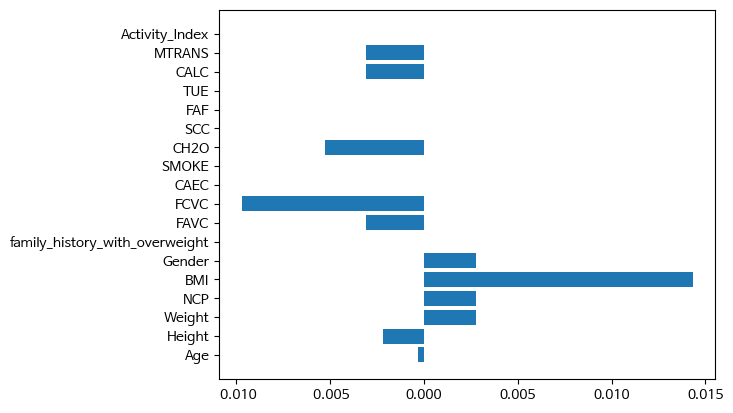

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ï†ÑÏ≤¥ ÌîºÏ≤òÎ°ú ÌïôÏäµÌïú Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏
base_model = SVC()
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)

# baseline recall (Îã§Ï§ë ÌÅ¥ÎûòÏä§ÎãàÍπå average ÏÑ§Ï†ï!)
baseline_recall = recall_score(y_test, base_pred, average='macro')

#--- Drop columns Í≥ÑÏÇ∞

lst = {}
for col in X.columns :
  X_train_drop = X_train.drop(columns = [col])
  X_test_drop  = X_test.drop(columns = [col])

  model = SVC()
  model.fit(X_train_drop, y_train)
  drop_rped = model.predict(X_test_drop)

  drop_recall = recall_score(y_test, drop_rped, average = 'macro')
  drop_value = baseline_recall - drop_recall
  lst[col] = drop_value


drop_df = pd.DataFrame(lst.items(), columns = ['columns','drop_value'])

plt.barh(drop_df['columns'] , drop_df['drop_value'])

print('''
Recall Í∞êÏàòÎüâÏù¥ ÌÅ¥ÏàòÎ°ù Î™®Îç∏ ÏÑ±Îä•Ïóê Ï§ëÏöîÌïú Í∏∞Ïó¨Î•º Ìïú Í≤ÉÏúºÎ°ú BMI, Gender, NCP, Weight Í∞Ä Î™®Îç∏ ÏÑ†ÏúºÏóê Ï§ëÏöîÌïú Í∏∞Ïó¨Î•º Ìïú Í≤ÉÏúºÎ°ú Ìï¥ÏÑù
ÏùåÏàòÏù∏ Í≤ΩÏö∞Îäî Î™®Îç∏Ïóê Ï§ëÏöîÌïòÏßÄ ÏïäÍ±∞ÎÇò, Î∞©Ìï¥ÏöîÏù∏ÏúºÎ°ú Ìï¥ÏÑùÎêòÎ©∞, FCVC, FACV, CH20, MTRANS, CALC Ïª¨ÎüºÏùò Í≤ΩÏö∞ Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÎã§Í≥† Ìï¥ÏÑùÎêúÎã§.
''')

#### ‚úÖ 3.1 ÏïÑÎûòÏùò Í∏∞Ï§ÄÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÏó¨ Ï†ÅÏ†ï Ï≤¥Ï§ë Ïó¨Î∂Ä Ïª¨ÎüºÏùÑ ÏÉùÏÑ±ÌïòÍ≥† BMIÎ•º 5Îã®ÏúÑÎ°ú Íµ¨Î∂ÑÌïòÏó¨ ÏôÄ Ï†ÅÏ†ï Ï≤¥Ï§ëÏó¨Î∂ÄÏóê ÎåÄÌïú ÎπàÎèÑ ÌëúÎ•º ÎßåÎì§Ïñ¥Îùº
    bmi Í≥ÑÏÇ∞ - Bmi = Î™∏Î¨¥Í≤å(kg)/(ÌÇ§(m)**2)

    ÎßåÎÇòÏù¥ Íµ¨ÌïòÍ∏∞ - Í±¥Í∞ïÍ≤ÄÏßÑÏùÑ Î∞õÏïòÎçò ÎÇ†ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÉùÎÖÑÏõîÏùºÍ≥º ÏùºÏàò Ï∞®Ïù¥Í∞Ä 16ÎÖÑ 364Ïùº Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ Îßå 16ÏÑ∏ Í∑∏ Ïù¥ÏÉÅÏùò Í≤ΩÏö∞ Îßå 17Î°ú Î∂ÑÎ•òÌïòÎùº - Ïú§ÎÖÑ Îì±ÏùÄ Í≥†Î†§ÌïòÏßÄ ÏïäÎäîÎã§. ÌñáÏàòÎ°ú 16ÎÖÑ + ÏùºÏàòÎ°ú 364ÏùºÏù¥ Í∏∞Ï§ÄÏù¥Îã§

    Ï†ÅÏ†ï Ï≤¥Ï§ë Ïó¨Î∂Ä (BMIÍ∞Ä ÏïÑÎûò Íµ¨Í∞ÑÏóê Îì§Ïñ¥Ïò¨ Í≤ΩÏö∞)
    17ÏÑ∏ ÎÇ®Ïûê : 21.03Ïù¥ÏÉÅ 23.21 ÎØ∏Îßå
    17ÏÑ∏ Ïó¨Ïûê : 20.03Ïù¥ÏÉÅ 22.39 ÎØ∏Îßå
    16ÏÑ∏ ÎÇ®Ïûê : 21.18Ïù¥ÏÉÅ 23.45 ÎØ∏Îßå
    16ÏÑ∏ Ïó¨Ïûê : 19.61Ïù¥ÏÉÅ 21.74 ÎØ∏Îßå

In [76]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv')
df.head(3)

ID       ÌÇ§  weight      ÏÉùÎÖÑÏõîÏùº       Í±¥Í∞ïÍ≤ÄÏßÑÏùº  Í≥µÌïôÏó¨Î∂Ä  Ï±ÑÏÜåÏÑ≠Ï∑®Ï†ïÎèÑ  ÏïÑÏπ®ÏãùÏÇ¨Ïó¨Î∂Ä  \
0  ID_4135  169.01   65.47  20041003  2020_11_15     1       2       1   
1  ID_3289  181.62   69.36  19970725  2014_11_20     0       3       0   
2  ID_1847  160.89   65.12  20020921  2020_01_28     1       1       1   

   ÏùºÏ£ºÏùºÏö¥ÎèôÏãúÍ∞Ñ  ÏàòÎ©¥ÏãúÍ∞Ñ  ÏÑ±Î≥Ñ  
0      4.4   8.3  ÎÇ®ÏÑ±  
1      4.4   6.9  ÎÇ®ÏÑ±  
2      1.7   9.6  Ïó¨ÏÑ±

In [77]:
# BMI Í≥ÑÏÇ∞
df['bmi'] = df['weight'] / (df['ÌÇ§'] /100) **2

In [78]:
# ÎßåÎÇòÏù¥
# 1) ÎπÑÍµê ÎÇ†Ïßú ÏÉùÏÑ± ÏÉùÎÖÑÏõîÏùºÏùò "ÏõîÏùº" + Í±¥Í∞ïÍ≤ÄÏßÑÏùºÏùò "ÎÖÑ" ÏùÑ Ìï©Ï≥ê year Î≥ÄÏàò ÏÉùÏÑ±
#df['new_year'] =
df['new_year'] = pd.to_datetime(df['Í±¥Í∞ïÍ≤ÄÏßÑÏùº'].str.split('_').str[0] +'-' +df['ÏÉùÎÖÑÏõîÏùº'].astype(str).str[4:], format = '%Y-%m%d')




In [79]:

df['ÏÉùÎÖÑÏõîÏùº'] = pd.to_datetime(df['ÏÉùÎÖÑÏõîÏùº'], format = '%Y%m%d')
df['Í±¥Í∞ïÍ≤ÄÏßÑÏùº'] = pd.to_datetime(df['Í±¥Í∞ïÍ≤ÄÏßÑÏùº'], format = '%Y_%m_%d')


# ÎÖÑÎèÑ Ï∞®Ïù¥ = 16ÎÖÑ ÏÉùÎÖÑÏõîÏùº VS Í±¥Í∞ïÍ≤ÄÏßÑÏùº
df['year_diff'] = df['Í±¥Í∞ïÍ≤ÄÏßÑÏùº'].dt.year - df['ÏÉùÎÖÑÏõîÏùº'].dt.year

# Ïùº Ï∞®Ïù¥ = 16ÎÖÑ ÏÉùÎÖÑÏõîÏùº VS Í±¥Í∞ïÍ≤ÄÏßÑÏùº
df['day_diff'] = (df['Í±¥Í∞ïÍ≤ÄÏßÑÏùº'] - df['new_year']).dt.days


# ÎßåÎÇòÏù¥ Íµ¨ÌïòÍ∏∞
# ÌñáÏàòÎ°ú 16ÎÖÑ - 17Ïù¥ÏÉÅÏù¥Î©¥ 17
# 16Ïù¥Í≥†, 364ÏùºÎ≥¥Îã§ ÌÅ¨Î©¥ 17

def ages(df) :
  year_diff = df['year_diff']
  day_diff = df['day_diff']

  if year_diff >= 17 :
    return 17

  elif year_diff == 16 and day_diff > 364 :
    return 17

  else :
    return 16

df['ÎßåÎÇòÏù¥'] = df.apply(ages, axis = 1)#.value_counts()

In [80]:
# Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä

def is_normal(df) :
  age = df['ÎßåÎÇòÏù¥']
  gender = df['ÏÑ±Î≥Ñ']
  bmi = df['bmi']

  if age >= 17 and gender == 'ÎÇ®ÏÑ±' :
    if 21.03 <= bmi < 23.21 :
      return 'Ï†ïÏÉÅ'
    else :
      return 'ÎπÑÏ†ïÏÉÅ'

  elif age >= 17 and gender == 'Ïó¨ÏÑ±' :
    if 20.03 <= bmi < 22.39 :
      return 'Ï†ïÏÉÅ'
    else :
      return 'ÎπÑÏ†ïÏÉÅ'

  elif age ==16 and gender == 'ÎÇ®ÏÑ±' :
    if 21.18 <= bmi < 23.45 :
      return 'Ï†ïÏÉÅ'
    else :
      return 'ÎπÑÏ†ïÏÉÅ'

  elif age ==16  and gender == 'Ïó¨ÏÑ±' :
    if 19.61 <= bmi < 21.74 :
      return 'Ï†ïÏÉÅ'
    else :
      return 'ÎπÑÏ†ïÏÉÅ'

df['Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä'] = df.apply(is_normal, axis = 1)

#### ‚úÖ 3.2 3-1ÏóêÏÑú Íµ¨Ìïú Ï†ÅÏ†ï Ï≤¥Ï§ë Ïó¨Î∂ÄÏôÄ ÎÇòÎ®∏ÏßÄ Ïª¨Îüº(Í≥µÌïôÏó¨Î∂Ä, ÏïÑÏπ®ÏãùÏÇ¨Ïó¨Î∂Ä, ÏùºÏ£ºÏùºÏö¥ÎèôÏãúÍ∞Ñ, Ï±ÑÏÜåÏÑ≠Ï∑®Ï†ïÎèÑ, ÏàòÎ©¥ÏãúÍ∞Ñ, ÏÑ±Î≥Ñ) Ïù¥ ÎèÖÎ¶ΩÏ†ÅÏù∏ÏßÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÌôïÏù∏

In [81]:
cols = ['Í≥µÌïôÏó¨Î∂Ä' ,'ÏïÑÏπ®ÏãùÏÇ¨Ïó¨Î∂Ä','ÏùºÏ£ºÏùºÏö¥ÎèôÏãúÍ∞Ñ', 'ÏàòÎ©¥ÏãúÍ∞Ñ' ,'Ï±ÑÏÜåÏÑ≠Ï∑®Ï†ïÎèÑ' ,'ÏÑ±Î≥Ñ']

lst = []
for col in cols :
  if col in ['Í≥µÌïôÏó¨Î∂Ä' , 'Ï±ÑÏÜåÏÑ≠Ï∑®Ï†ïÎèÑ' ,'ÏÑ±Î≥Ñ' ,'ÏïÑÏπ®ÏãùÏÇ¨Ïó¨Î∂Ä'] :
    target = pd.crosstab(df[col], df['Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä'])
    stat, p_val, dof, expected = chi2_contingency(target)

  else :
    g1 = df[df['Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä'] == 'Ï†ïÏÉÅ'][col]
    g2 = df[df['Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä'] == 'ÎπÑÏ†ïÏÉÅ'][col]

    stat, p_val = ttest_ind(g1, g2, equal_var = True)

  lst.append([col, p_val])

pd.DataFrame(lst, columns = ['col','p_val'])

col     p_val
0     Í≥µÌïôÏó¨Î∂Ä  0.028622
1   ÏïÑÏπ®ÏãùÏÇ¨Ïó¨Î∂Ä  0.545861
2  ÏùºÏ£ºÏùºÏö¥ÎèôÏãúÍ∞Ñ  0.526151
3     ÏàòÎ©¥ÏãúÍ∞Ñ  0.008380
4   Ï±ÑÏÜåÏÑ≠Ï∑®Ï†ïÎèÑ  0.024652
5       ÏÑ±Î≥Ñ  0.356966

#### ‚úÖ 3.3 ÏúÑÏóêÏÑú Ïú†ÏùòÌïú Î≥ÄÏàòÎì§Îßå Í∞ÄÏßÄÍ≥† Ï†ÅÏ†ï Ï≤¥Ï§ë Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌïòÍ≥† ÏÑ±Îä• ÌèâÍ∞Ä Î∞è Ìï¥ÏÑùÏùÑ ÌïòÎùº (Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä ,xgb)

    Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä Î™®Îç∏ÏùÄ Ïò§Ï¶àÎπÑÎ•º Íµ¨ÌïòÎùº xgbÏùò Í≤ΩÏö∞ Í∞Å ÌîºÏ≥êÏ§ëÏöîÎèÑÎ•º ÌôïÏù∏ÌïòÍ≥† ÏòàÏ∏°Ïóê ÏòÅÌñ•ÏùÑ Í∞ÄÏû• ÎØ∏ÏπòÎäî Î≥ÄÏàòÎ•º ÌôïÏù∏ÌïòÎùº

In [82]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

r_df = df[['Í≥µÌïôÏó¨Î∂Ä','ÏàòÎ©¥ÏãúÍ∞Ñ','Ï±ÑÏÜåÏÑ≠Ï∑®Ï†ïÎèÑ','Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä']]
r_df['Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä'] = r_df['Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä'].map({'Ï†ïÏÉÅ': 1, 'ÎπÑÏ†ïÏÉÅ':0})

x = r_df.drop(columns = 'Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä', axis = 1)
y = r_df['Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä']

def eval_model(model, name) :
  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 13)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  acc = accuracy_score(y_test, pred)

  return acc


lst = []
model_lst = []

for name, model in [['LR', LogisticRegression()] , ['XGB',XGBRFClassifier() ]] :
  acc = eval_model(model, name)
  lst.append([name, acc])
  model_lst.append([name, model])

res = pd.DataFrame(lst, columns = ['Models', 'Accuracy_score'])
display(res)

Models  Accuracy_score
0     LR        0.578148
1    XGB        0.571779

array([1.12977424, 1.04815121, 0.99961824])

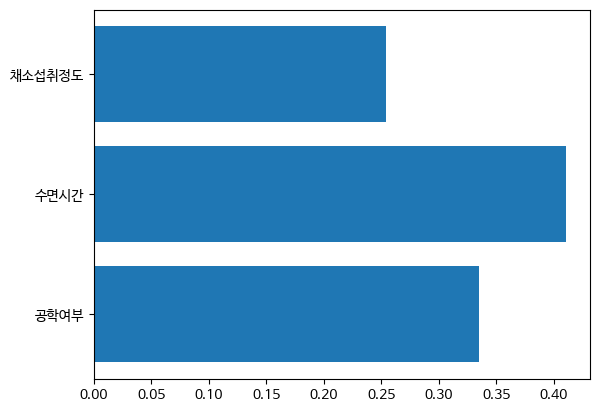

In [83]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

for name , model in model_lst :
  if name == 'LR' :
    odds_ratio = np.exp(model.coef_[0]) # Ïò§Ï¶àÎπÑ
    display(odds_ratio)

  elif name == 'XGB' :
    importance = model.feature_importances_
    features = model.feature_names_in_

    plt.barh(features, importance)

#### ‚úÖ 3.4 Îëê Î™®Îç∏Ïùò roc-auc Í∑∏ÎûòÌîÑÎ•º ÌïòÎÇòÏùò Í∑∏ÎûòÌîÑÏóê Í≤πÏ≥ê Í∑∏Î†§Îùº

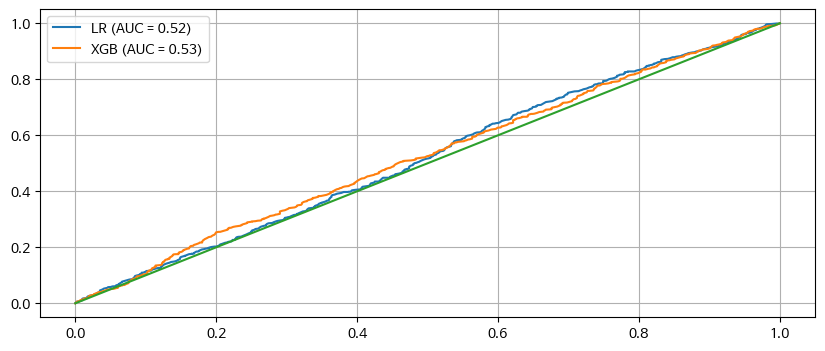

In [84]:
r_df = df[['Í≥µÌïôÏó¨Î∂Ä','ÏàòÎ©¥ÏãúÍ∞Ñ','Ï±ÑÏÜåÏÑ≠Ï∑®Ï†ïÎèÑ','Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä']]
r_df['Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä'] = r_df['Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä'].map({'Ï†ïÏÉÅ': 1, 'ÎπÑÏ†ïÏÉÅ':0})

x = r_df.drop(columns = 'Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä', axis = 1)
y = r_df['Ï†ÅÏ†ïÏ≤¥Ï§ëÏó¨Î∂Ä']

# plot
plt.figure(figsize=(10, 4))

def eval_model(model, name) :
  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 13)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  # Roc_CureÏö© - predict_proba[:,1]
  pred_proba = model.predict_proba(x_test)[:,1]

  acc = accuracy_score(y_test, pred)
  # Roc_CureÏö©
  auc = roc_auc_score(y_test, pred_proba)
  # ROC Curve
  fpr, tpr, _ = roc_curve(y_test, pred_proba)
  plt.plot(fpr, tpr, label = f'{name} (AUC = {auc:.2f})')

  return acc

## eval_model Ìò∏Ï∂ú
lst = []
for name, model in [['LR', LogisticRegression()] , ['XGB',XGBRFClassifier() ]] :
  acc = eval_model(model, name)
  lst.append([name, acc])

plt.plot([0,1],[0,1])
plt.grid(True)
plt.legend()
plt.show()

#### üìä ÌÜµÍ≥Ñ (40Ï†ê)
##### ‚úÖ 1. Ïñ¥Îäê ÌöåÏÇ¨Ïùò Ï†úÌíà Î¨¥Í≤åÎäî N(?, 100) Ïùò Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Í≥† ÏïåÎ†§Ï†∏ ÏûàÎã§. Ïù¥Îïå, ÏÇ¨Ï†ÑÏ†ÅÏúºÎ°ú Ïö∞Î¶¨Îäî Ï†úÌíàÏùò ÌèâÍ∑† Î¨¥Í≤å Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨ N(100, 256) ÏóêÏÑú Ïò®Îã§Í≥† Í∞ÄÏ†ïÌïúÎã§. Ï†úÌíà Ï§ë ÌïòÎÇòÏùò Ïã§Ï†ú Ï∏°Ï†ïÎêú Î¨¥Í≤åÍ∞Ä 120kgÏùº Îïå, Ïù¥ Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú ÏÇ¨ÌõÑÎ∂ÑÌè¨Ïùò ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÏãúÏò§.

In [85]:
# N(100, 256) - ÌèâÍ∑† 100, Î∂ÑÏÇ∞ 256 / ÌëúÏ§ÄÌé∏Ï∞® 16

x = 100   #ÏÇ¨Ï†ÑÌèâÍ∑†
var = 256  #ÏÇ¨Ï†ÑÎ∂ÑÏÇ∞

x_obs = 120    #Í¥ÄÏ∏°Í∞í
var_obs = 100  #Ï†úÌíàÏùò Î¨¥Í≤åÏùò Î∂ÑÏÇ∞

# ÏÇ¨ÌõÑ Î∂ÑÌè¨ ÌèâÍ∑† Í≥ÑÏÇ∞Í≥µÏãù (ÏÇ¨Ï†ÑÌèâÍ∑†/ÏÇ¨Ï†ÑÎ∂ÑÏÇ∞ + Í¥ÄÏ∏°Í∞í/Î∂ÑÏÇ∞) / (1/ÏÇ¨Ï†ÑÎ∂ÑÏÇ∞ + 1/Ï†úÌíàÏùòÎ∂ÑÏÇ∞)
mean = (x/var + x_obs /var_obs) / (1/var + 1/var_obs)
print(mean)

# ÏÇ¨ÌõÑ Î∂ÑÌè¨ Î∂ÑÏÇ∞
var = 1 / (1/var + 1/var_obs)
print(var)

114.3820224719101
71.91011235955057


##### ‚úÖ 2.1 ÌöåÍ∑Ä Î™®Îç∏ÎßÅ ÌõÑ Ïú†ÏùòÌïòÏßÄ ÏïäÎäîÎ≥ÄÏàò ÌååÏïÖ

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv')
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [87]:
import statsmodels.api as sm

x = df.drop(columns = ['Sales'], axis = 1)
y = df['Sales']

add_x = sm.add_constant(x)
model = sm.OLS(y, add_x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           8.13e-99
Time:                        13:07:35   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

##### ‚úÖ 2.2 Î≥ÄÏàò ÏÑ†ÌÉùÏãú Î®ºÏ†Ä Ï†úÍ±∞ Îê† Î≥ÄÏàò Î∞è Í∑ºÍ±∞ Ï†úÏãú

In [88]:
print('''
Î®ºÏ†Ä Ï†úÍ±∞ ÎêòÏñ¥ÏïºÌïòÎäî Î≥ÄÏàòÎäî Newspapaer Î°ú p_value 0.954Î°ú SalesÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÎäîÎã§.
''')


Î®ºÏ†Ä Ï†úÍ±∞ ÎêòÏñ¥ÏïºÌïòÎäî Î≥ÄÏàòÎäî Newspapaer Î°ú p_value 0.954Î°ú SalesÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÎäîÎã§. 



##### ‚úÖ 2.3 VIFÎ•º ÌÜµÌïú Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÏßÑÎã®

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features']= x.columns

vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif)

    Features       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


‚úÖ 2.4  A,B,C,D,E ÏòÅÏóÖÏÇ¨ÏõêÏùò Í∞Å Í≥ÑÏïΩ ÏÑ±ÏÇ¨ Ïú†Î¨¥ (1:Í≥ÑÏïΩ , 0:ÎØ∏Í≥ÑÏïΩ) Î•º ÎÇòÌÉÄÎÇ∏ Îç∞Ïù¥ÌÑ∞Ïù¥Îã§. ÏòÅÏóÖÏÇ¨ÏõêÏùò ÌèâÍ∑† Í≥ÑÏïΩ ÏÑ±ÏÇ¨ Í±¥ÏàòÎäî Í∞ôÏùÄÏßÄ ÌÜµÍ≥Ñ Í≤ÄÏ†ï

In [93]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv',index_col = 0)
df.head(3)

# Í∑ÄÎ¨¥ : ÏòÅÏóÖ ÏÇ¨ÏõêÏùò ÌèâÍ∑† Í≥ÑÏïΩ ÏÑ±ÏÇ¨ Í±¥ÏàòÎäî Í∞ôÎã§.
# ÎåÄÎ¶Ω : ÏòÅÏóÖ ÏÇ¨ÏõêÏùò ÌèâÍ∑† Í≥ÑÏïΩ ÏÑ±ÏÇ¨ Í±¥ÏàòÎäî Îã§Î•¥Îã§.

from statsmodels.stats.contingency_tables import cochrans_q

coch= cochrans_q(df)
print(coch.pvalue)

if coch.pvalue < 0.05 :
  print('ÏòÅÏóÖ ÏÇ¨ÏõêÏùò ÌèâÍ∑† Í≥ÑÏïΩ ÏÑ±ÏÇ¨ Í±¥ÏàòÎäî Îã§Î•¥Îã§')

else :
  print('ÏòÅÏóÖ ÏÇ¨ÏõêÏùò ÌèâÍ∑† Í≥ÑÏïΩ ÏÑ±ÏÇ¨ Í±¥ÏàòÎäî Í∞ôÎã§.')

0.3406392758219471
ÏòÅÏóÖ ÏÇ¨ÏõêÏùò ÌèâÍ∑† Í≥ÑÏïΩ ÏÑ±ÏÇ¨ Í±¥ÏàòÎäî Í∞ôÎã§.
